<a href="https://colab.research.google.com/github/JordiPG05/Curso-Yolo/blob/main/Intersection_Over_Union_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Intersection Over Union (IOU)**

#IOU is evaluation metric used to measure overlap between predictions from the object detection model and actual ground truth

#IOU is mainly used in applications related to object detection where we train our model to output a box that fits perfectly around the object

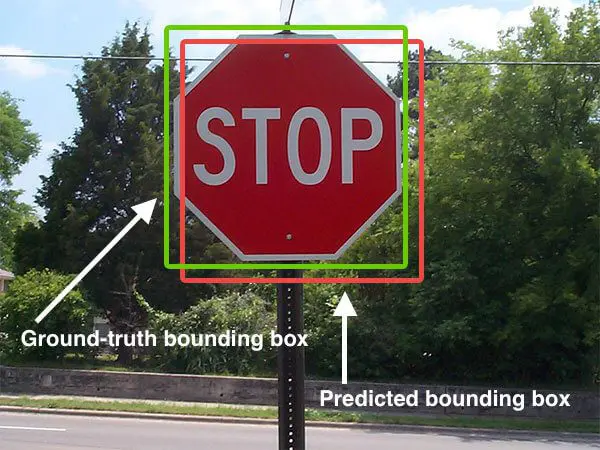

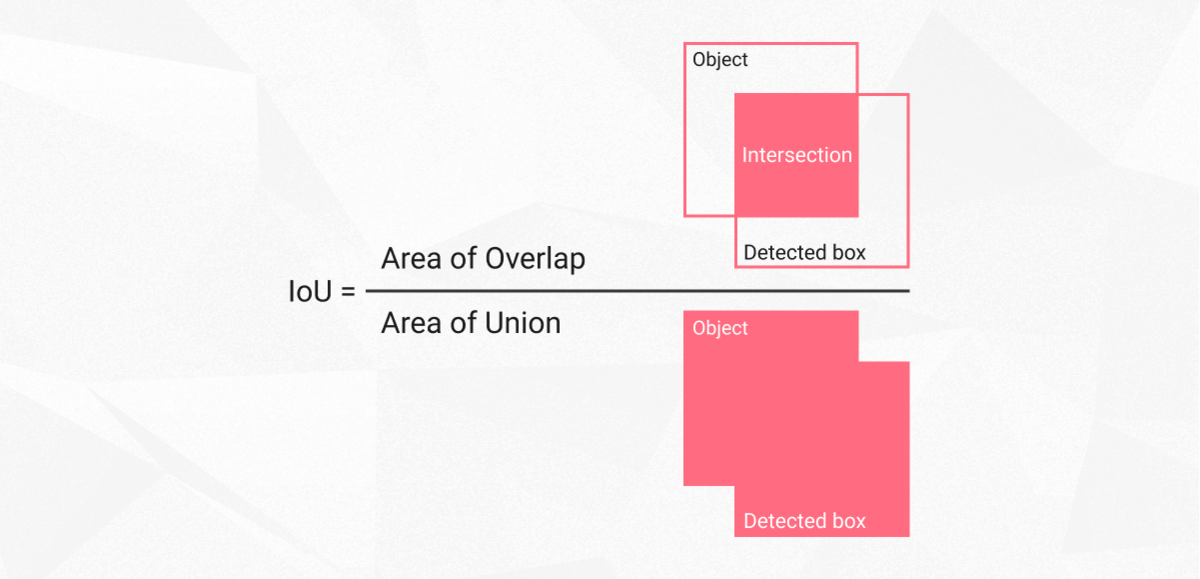

#**Why do we need IOU**

#1. IOU is calculated to measure the accuracy of object detection model. 

#2. It is used in Non Max Supression

#3. IOU is a good metric to tell you which object detection model is giving better results in terms of accuracy

#**Import All the Required Libraries**

In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt

#**Create a Function, to read the annotations from the Text File Line by Line**

In [ ]:
def read_annotations(filepath):
    with open(filepath) as f:
        return f.readlines()

#**Download the Ground Truth Annotation, Model A and Model B Annotation Text File From the Drive**

In [ ]:
!gdown "https://drive.google.com/uc?id=1pw7dFQrYtVLSuvAzRfHHt-AXJ3NSIG1k&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1pw7dFQrYtVLSuvAzRfHHt-AXJ3NSIG1k&confirm=t
To: /content/Ground-Truth.txt
100% 39.0/39.0 [00:00<00:00, 116kB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=12F62F4qitxGt0aVPCvFYhhJSewGHkBB3&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=12F62F4qitxGt0aVPCvFYhhJSewGHkBB3&confirm=t
To: /content/Model-A.txt
100% 39.0/39.0 [00:00<00:00, 136kB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1_ayG_JBknaa14PVFnHPcCpuj37njOiS6&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1_ayG_JBknaa14PVFnHPcCpuj37njOiS6&confirm=t
To: /content/Model-B.txt
100% 40.0/40.0 [00:00<00:00, 155kB/s]


#**Reading the Annotations**

In [ ]:
annotations = read_annotations('/content/Ground-Truth.txt')

In [ ]:
annotations

['131,696,1045,1644,0\n', '983,232,1772,1591,1']

#**Process the Anotations and Convert them into the Required Format**

In [ ]:
def process_annotations(annotations):
    bboxes = []
    for line in annotations:
        line = line.split(',')
        line = [ int(elem.replace('\n','')) for elem in line]
        pts = line[0:4]
        bboxes.append(pts)
    return bboxes
        

#**Display the Input Image**

In [ ]:
!gdown "https://drive.google.com/uc?id=1MWC3lDOUqw5QKdKhbM63ZZUsRKhPVPU2&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1MWC3lDOUqw5QKdKhbM63ZZUsRKhPVPU2&confirm=t
To: /content/Image.jpg
100% 320k/320k [00:00<00:00, 93.6MB/s]


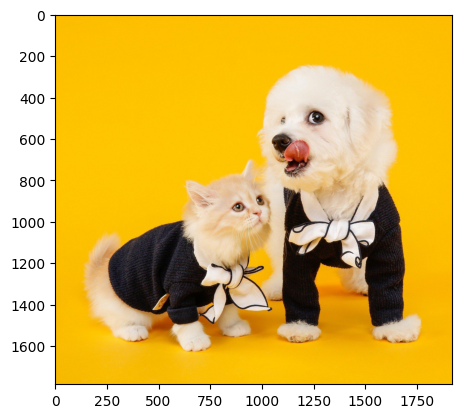

In [ ]:
img = cv2.imread('/content/Image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
def draw_bboxes(img, color, bboxes):
    for bbox in bboxes:
        cv2.rectangle(img, bbox[0:2], bbox[2:4], color, 10)
    return img

In [ ]:
# Draw Ground Truth

GT_annotations = read_annotations('/content/Ground-Truth.txt')
GT_annotations = process_annotations(GT_annotations)
color = (0,255,0) #Green
img = draw_bboxes(img, color, GT_annotations )

In [ ]:
# Draw Model A Predictions

A_annotations = read_annotations('/content/Model-A.txt')
A_annotations = process_annotations(A_annotations)
color = (0,0,255) # Blue
img = draw_bboxes(img, color, A_annotations )

In [ ]:
# Draw Model B Predictions

B_annotations = read_annotations('/content/Model-B.txt')
B_annotations = process_annotations(B_annotations)
color = (255,0,0) #Red
img = draw_bboxes(img, color, B_annotations )

#**Green Color Bounding Box represents the Ground-Truth Bounding Box**

#**Blue Color Bounding Box is the Model A predictions**

#**Red Color Bounding Box is the Model B Predictions**


#**Red Color Bounding Box are better fit than Blue Color Bounding Box and are more close to the Groun Truth**

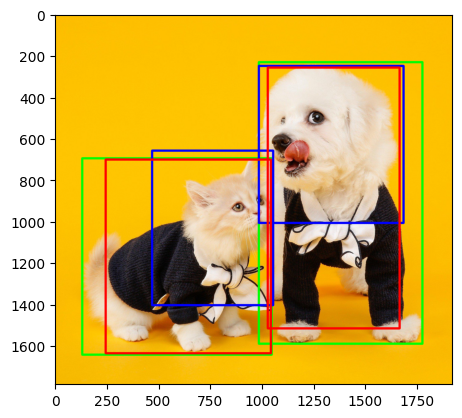

In [ ]:
plt.imshow(img)
plt.show()

#**Convert the Annotations to PyTorch Tensor**

In [ ]:
ground_truth = torch.Tensor(GT_annotations)
model_a = torch.Tensor(A_annotations)
model_b = torch.Tensor(B_annotations)


#**To calculate the Area of Intersection We need corner coordinates for the intersection area**

#P1=MAX(gx1,bx1), MAX(gy1, by1)
#P2=MIN(gx2, bx2), MIN(gy2,by2)

#P1=MAX(2,5), MAX(1,3)
#P2=MIN(9,13), MIN(7,9)

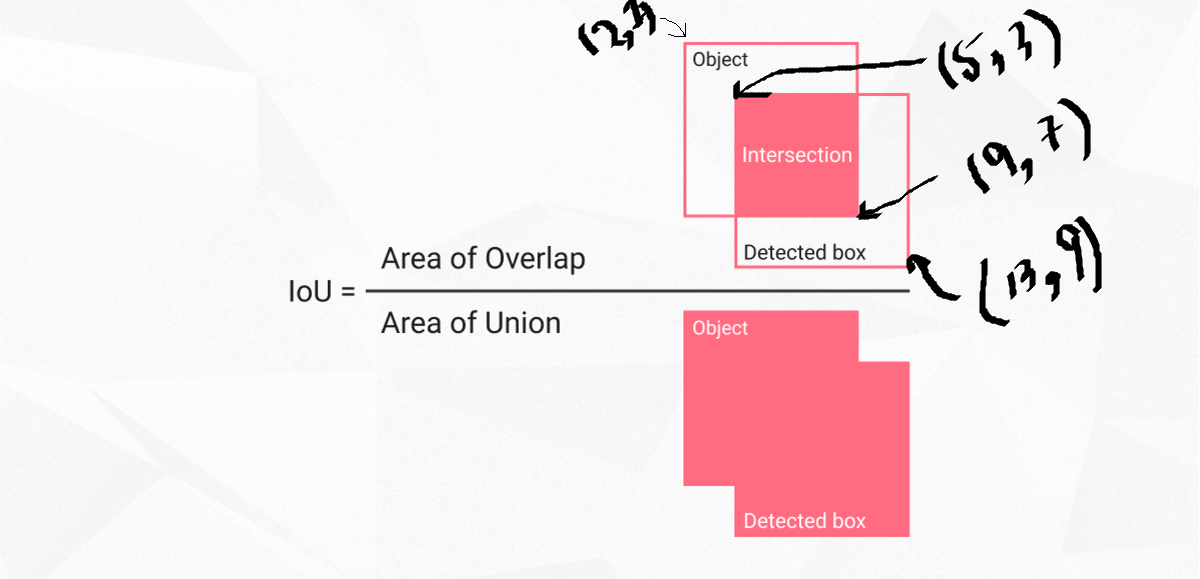

In [ ]:
def calculate_IOU(preds, labels):
   #..., three dots, Transform Only One Dimension and want other to remain same 
    preds_x1 = preds[..., 0:1]
    preds_y1 = preds[..., 1:2]
    preds_x2 = preds[..., 2:3]
    preds_y2 = preds[..., 3:4]
    
    labels_x1 = labels[..., 0:1]
    labels_y1 = labels[..., 1:2]
    labels_x2 = labels[..., 2:3]
    labels_y2 = labels[..., 3:4]
    
    x1 = torch.max(preds_x1, labels_x1)
    y1 = torch.max(preds_y1, labels_y1)
    
    x2 = torch.min(preds_x2, labels_x2)
    y2 = torch.min(preds_y2, labels_y2)
    # clamp(0), to handle cases where there is no overlap or intersection
    #Area of Intersection = Length*Breath
    area_of_intersection = (x2-x1).clamp(0) * (y2-y1).clamp(0)
    
    preds_area = abs((preds_x2 - preds_x1) * (preds_y2 - preds_y1))
    labels_area = abs((labels_x2 - labels_x1) * (labels_y2 - labels_y1))
    
    area_of_union = preds_area + labels_area - area_of_intersection
    
    return area_of_intersection / area_of_union
    
    

    

In [ ]:
calculate_IOU(model_a, ground_truth)

tensor([[0.4581],
        [0.4934]])

In [ ]:
calculate_IOU(model_b, ground_truth)

tensor([[0.8600],
        [0.7468]])